In [9]:
%matplotlib inline
from matplotlib import rcParams

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8')

# Introduction to clustering

Clustering is a machine learning technique used to group unlabeled datapoints in groups called *clusters*. The grouping is done such that similar items are together in the same cluster and items in different clusters are dissimilar from each-other. Typically similarity is defined using a distance measure (Euclidean, cosine, etc). Common practical applications for clustering include: market segmentation, social network analysis, search result grouping, anomaly detection etc.


Two clustering methods will be explored in this notebook:

- K-means.
- Hierarchical clustering.

More methods can be found [here](https://scikit-learn.org/stable/modules/classes.html?highlight=cluster#module-sklearn.cluster).

#### To begin with
Get familiar with how clustering works by watching the videos in Resources A and reading the article in Resources B.


#### Resources: 

* A. Introduction to clustering:
    * https://www.youtube.com/watch?v=4cxVDUybHrI
    
    
* B. A Comprehensive Survey of Clustering Algorithms
    * https://link.springer.com/article/10.1007/s40745-015-0040-1 (Read everything until the section Traditional Clustering Algorithms. From the section Traditional Clustering Algorithms, read the first 2 subsections. You can skip Modern Traditional Clustering Algorithms.)



* C. K-means clustering:
     * https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
     
     * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)
     
     
* D. Hierarchical clustering:
    * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
    * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
    * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering 

### Subject comprehension 

To check your understanding, before moving further, answer the questions in your own words in the space below.

1. What is clustering?
2. What are the main steps in the standard process of clustering?
3. What is the Silhouette coefficient?
4. What are the two types of evaluation for a clustering algorithm and what is the difference between them?

<span style="color:Green">

1. Clustering is a way to group individuals or observations according to common patterns that they have.
2. 

3. **Silhouette coefficient** ($ -1 \leq s \leq 1$)

$$ s = \frac{b - a}{max(a, b)} $$
with $a$ the mean distance between each observation in the same cluster (intra-cluster mean), $b$ the mean distance relative to the much closer cluster.

When $s \to -1$, this meant that the observation is not in the right cluster. If $s \to 0$, the observation is at the border of two clusters. When $s \to +1$, the observation tend to be at the center of the cluster.

</span>

### Data acquisition

Load the data about bank clients from the *bank-full.csv* file into a pandas dataframe. Make the necessary imports.

In [11]:
# code here
df = pd.read_csv('../data/bank-full.csv', sep=";")

Print a summary of the data as well as the first 5 rows.

In [12]:
# code here
print("All \n", df.info())
print("Number of values \n", df.nunique())
print("Numerical variables \n", df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
All 
 None
Number of values 
 age            77
job            12
marital         3
education      

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Preprocessing

To facilitate the computation of distances, keep only the numerical features in the dataset.

- Remove all non-numerical features, as well as the features related to the date.
- Make sure there are no missing values - if they exist, remove them.
- Normalize the new dataset (transform the data for multiple features to the same scale).
- Save the result in a dataframe *df_norm*

In [13]:
#from sklearn.decomposition import PCA

#pca = PCA()
#df_pca = pca.fit_transform(df)

In [14]:
# code here

df_prepro = df.select_dtypes(include=np.number).drop(columns=['duration','day'])
print("Is there missing values? \n", df_prepro.isna().sum())
#df_norm = df_norm.dropna(axis=0, how='any')

from sklearn.preprocessing import StandardScaler
"""
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

continuous_features = df_prepro.select_dtypes(include=np.number)
categorical_features = []

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
cat_pipeline = Pipeline([
        ('encoder', OneHotEncoder()),
    ])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, continuous_features),
        ("cat", cat_pipeline, categorical_features)
    ])

df_norm = full_pipeline.fit_transform(df_prepro)
"""

scaler = StandardScaler()
df_norm = scaler.fit_transform(df_prepro)

Is there missing values? 
 age         0
balance     0
campaign    0
pdays       0
previous    0
dtype: int64


Plot histograms of features

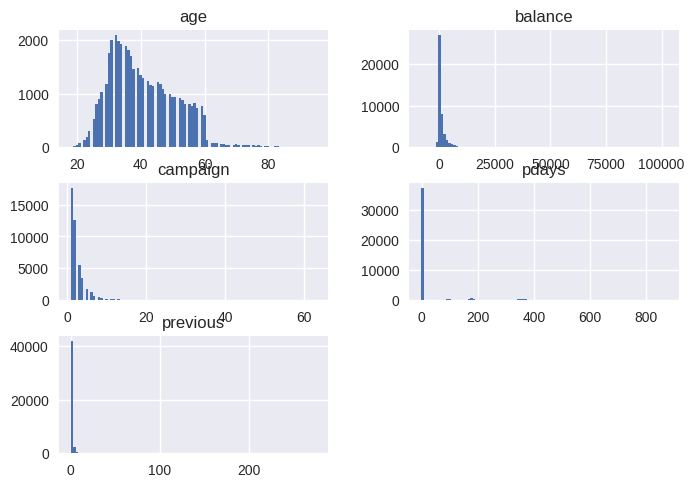

In [15]:
# code here
df_prepro.hist(bins=100)
plt.show()

In [ ]:
df_norm = df_norm.sample(frac=0.1)

## KMeans


Let's warm up with the well known algorithm named KMeans!

Centroid-based clustering organizes the data into non-hierarchical clusters, contrarily to hierarchical clustering. KMeans is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. 


To better understand the way the algorithm works, read the documents and watch the video in Resources C:
* https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
* https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)


Then answer the below questions (in your own words):
1. What is a centroid?
2. How can you compute a centroid?
3. Are you supposed to know in advance the number of clusters in order to use the KMeans algorithm?


<span style="color:Green">

1. .
2. 

</span>

#### Make the necessary imports from scikit learn in order to perform KMeans clustering

In [16]:
# code here
from sklearn.cluster import KMeans

#### Exploring KMeans with sklearn

The goal of this step is to become familiar with the sklearn clustering package and the silhouette analysis concepts.

Start by peforming a clustering of the data in *df_norm* into 5 clusters.

In [17]:
# code here

kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto")
kmeans.fit(df_norm)

KMeans(n_clusters=5, n_init='auto', random_state=0)

Print the centroids obtained

In [18]:
# code here

centroids = kmeans.cluster_centers_
print('The centroids obtained:\n', centroids)

The centroids obtained:
 [[ 0.24682479  4.36569929 -0.09404809 -0.10830067 -0.03762843]
 [-0.14381559 -0.07078919 -0.20822544  2.21739336  1.28938504]
 [-0.06449573 -0.1436033   3.85518614 -0.3992498  -0.23888752]
 [ 1.09193861 -0.05757738 -0.10927933 -0.33523242 -0.19213202]
 [-0.65804659 -0.16576467 -0.15687127 -0.37636714 -0.22146974]]


Print the cluster labels assigned to each point

In [19]:
# code here

labels = kmeans.predict(df_norm)
print('The cluster labels assigned to each point:\n', labels)

The cluster labels assigned to each point:
 [3 3 4 ... 3 3 1]


### **Visualization**

Let's try to visualize the created clusters. As it is easier to visualize 2-dimensional data, first run PCA on the data. Then create a scatterplot to visualize the clustered points, each coloured differently depending on the cluster they belong to.

In [49]:
# code here

from sklearn.decomposition import PCA

pca = PCA()
df_norm_pca = pca.fit_transform(df_norm)

"""
pca.transform(kmeans.cluster_centers_)

df_pca = pd.DataFrame(data=df_norm_pca, columns=['PCA 1', 'PCA 2'])
df_pca['Cluster label'] = kmeans.labels_
"""

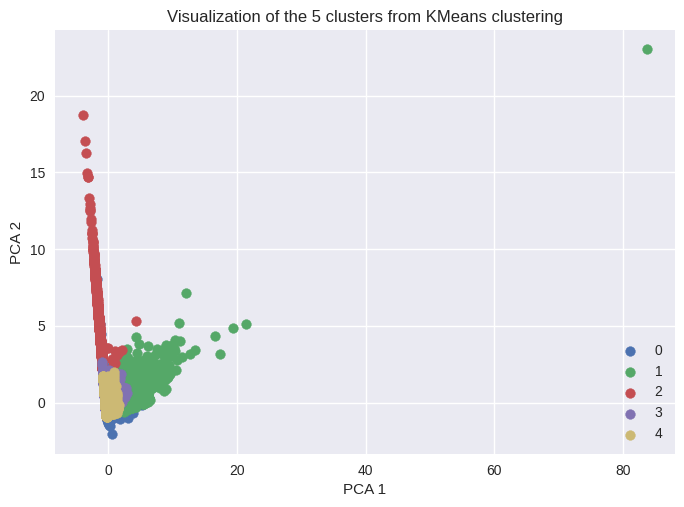

In [55]:
pca1, pca2 = 1, 2
u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(df_norm_pca[labels == i , pca1-1] , df_norm_pca[labels == i , pca2] , label = i)
plt.xlabel(f'PCA {pca1}')
plt.ylabel(f'PCA {pca2}')
plt.title('Visualization of the 5 clusters from KMeans clustering')
plt.legend()
plt.show()

### Evaluation

**Inertia** can be a measure of how internally coherent clusters are. It represents the within-cluster sum-of-squares.

Read more about it here:
https://scikit-learn.org/stable/modules/clustering.html#k-means 

Print the inertia obtained after the clustering.

In [21]:
# code here

inertia = kmeans.inertia_
print(f'The inertia obtained is {inertia}')

The inertia obtained is 102951.50979852519


**The silhouette score**

Make the necessary imports from scikit learn and compute the silhoutte score.

Read what this score represents and how it is computed here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html and here https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [22]:
# code here

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_norm, labels)

print(f'The average silhouette score is {silhouette_avg}.')

The average silhouette score is 0.3727237625797359.


You can read more about other clustering evaluation methods here: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

### Finding the optimal number of clusters

In the following article you will find several [methods](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) for determining the number of clusters.

We will first use the silhouette score for obtaining the optimal number of clusters. Optional: another method you can try is the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) ).


**Use the silhouette analysis to find an optimal number of clusters for the bank clients data.** <u><i>Hint:</u></i> Feel free to use the `n_jobs` hyperparameter to speed up your computation.

An example of silhouette analysis is presented here: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Plot the silhouette scores for 20 different numbers of clusters of your choice.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


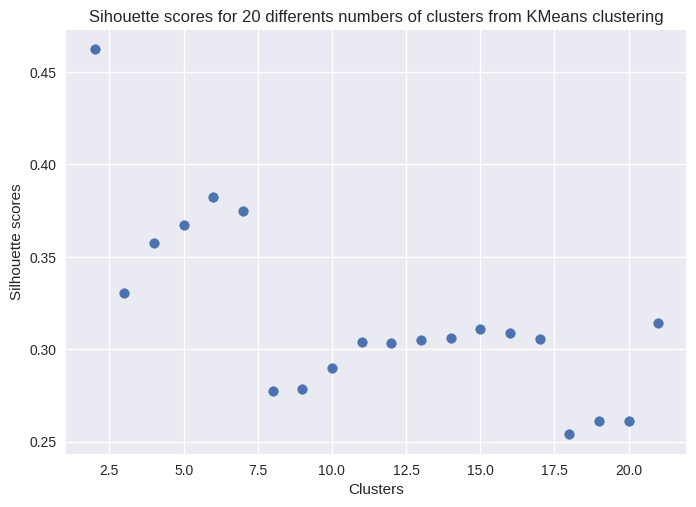

In [27]:
# code here

def get_silhouette_score(c, data):
    clusterer = KMeans(n_clusters=c, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(data)
    return silhouette_score(data, cluster_labels)

clusters = []
silhouette_scores = []

for c in range(2,22):
    clusters.append(c)
    silhouette_scores.append(get_silhouette_score(c, df_norm))


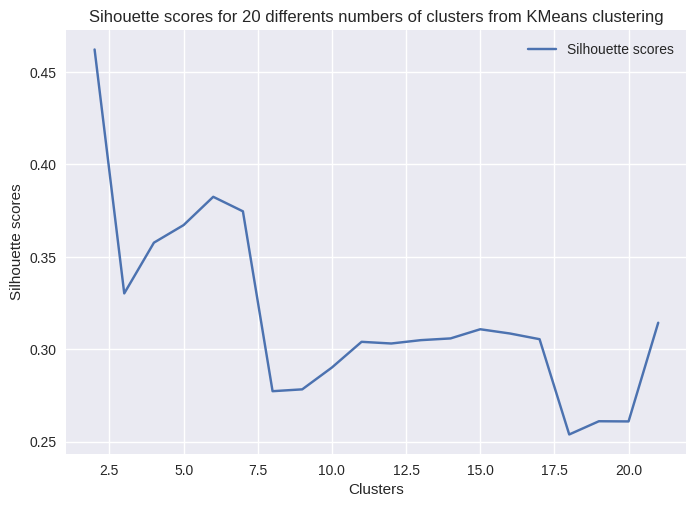

In [35]:
df_silhouette = pd.DataFrame(
    {'clusters': clusters,
     'Silhouette scores': silhouette_scores
    })
df_silhouette = df_silhouette.set_index('clusters')
df_silhouette.plot()
plt.xlabel('Clusters')
plt.ylabel('Silhouette scores')
plt.title('Sihouette scores for 20 differents numbers of clusters from KMeans clustering')
plt.legend()
plt.show()

What is the optimal number of clusters that you obtained?

In [62]:
print('The optimal number of clusters is', df_silhouette.iloc[df_silhouette.max()].index[0])

The optimal number of clusters is 2


## Hierarchical Clustering

Let's try to apply now a different method on the same data. You can find more explanations on hierarchical clustering in the links in section Resources D. Hierarhchical clustering:
 * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
 * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
 * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

Make the necessary imports from scikit learn to perform hierarchical clustering. 

Start by plotting the dendrogram and deciding the number of clusters. Then apply hierarchical clustering.

You might find this useful: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html for creating the dendrogram.

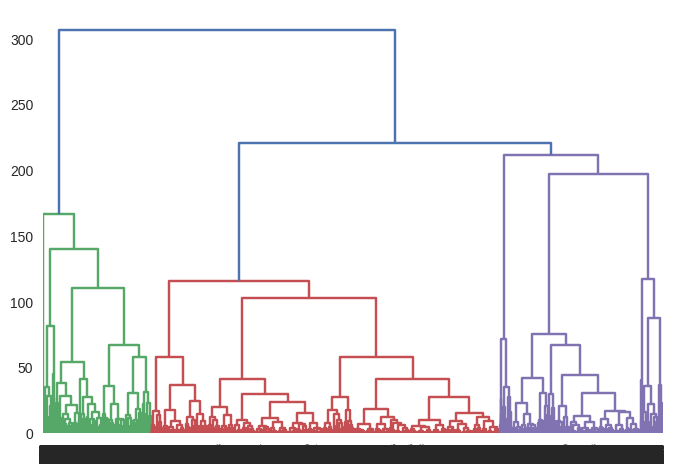

In [63]:
# code here

from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(df_norm, method='ward', metric='euclidean')

plt.figure(figsize=(15, 8))  
plt.title("Dendrograms")
dendrogram(linkage_data)

plt.show()

How many clusters did you find?

In [68]:
from scipy.cluster.hierarchy import fcluster

t = 
labels_hierarchy = fcluster(df_norm, t, criterion='distance')
print("The number of clusters is 3.")

NameError: name 't' is not defined

Compare the kmeans labels with the labels obtained by the hierarchical clustering.

In [ ]:
# code here

labels_hierarchy

### Application: clustering images

Theses techniques can be use to reduce the number of colours in a picture

- find a picture you want to reduce the number of colours.
- use `skimages` and `sklearn` to reduce the number of colours in this picture
- from your picture create two pictures with 16 colours what do you notice?

In [ ]:
# install skimage

#Code here

Now let's try to apply KMeans clustering on the simple digits data that can be loaded from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

The goal is to use KMeans to try to identify similar digits without using the original label information.

Start by loading the digits and then finding the KMeans clusters. The digits data consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image.

In [ ]:
# code here

The cluster centroids themselves are 64-dimensional points, and can thus be interpreted as the "typical" digit within the cluster. Plot each cluster center. Hint: use *imshow*

In [ ]:
# code here

For each of the data points we also have access to their real labels (using *digits.target*). This means we can verify if the clustering algorithm split the data in such a way as to predict the original classes. 

Note that the labels of the discovered clusters may not directly match the initial labels in the dataset (they could be permuted). Write code to match each learned cluster label with the true labels of the data found in them.

In [ ]:
# code here

Now compute the accuracy score between the true labels from the data and the predicted ones.

In [ ]:
# code here

Plot the confusion matrix between the predicted labels and the actual labels. Which were the digits that were most often confused with other digits?

In [ ]:
# code here

What if instead of keeping the original 64 features, we perform a projection into 2 dimensions?
Use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process the data before performing KMeans. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.

Compute the new accuracy.

In [ ]:
# code here